In [19]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_excel("../Datasets/Datasets4/CRM data.xlsx")

In [22]:
if len(df["client_code"].unique()) < len(df.index):
    df.drop_duplicates("client_code", keep="first")
    print("\tnuovo dataset:", len(df))
else:
    print("\tnon sono presenti duplicati")

	non sono presenti duplicati


In [23]:
df.head()

,client_code,installment,first_amount_spent,number_of_products,Y,center,age51_89,age36_50,dim_big,dim_medium,age15_35,sex,north,south_and_islands,dim_small
0,10500561,0,520000,0,0,0,0,0,0,1,1,0,0.0,1.0,0.0
1,10502394,1,1484000,2,0,0,0,1,0,0,0,1,0.0,1.0,1.0
2,10521224,0,2459000,1,0,0,1,0,0,1,0,1,0.0,1.0,0.0
3,1052312E,0,3389000,0,0,1,0,1,1,0,0,1,0.0,0.0,0.0
4,10579494,1,3823000,2,0,0,0,0,0,0,1,1,0.0,1.0,1.0


In [24]:
df.iloc[:,[6,7,10]]

,age51_89,age36_50,age15_35
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
2465,1,0,0
2466,1,0,0
2467,1,0,0
2468,0,1,0


In [52]:
def drop_inconsistent_rows(dataframe,column1,column2,column3):
    dataframe.drop(dataframe[dataframe.iloc[:,[column1,column2,column3]].sum(axis=1) != 1].index, inplace=True)
    
    print("rimozione inconsistenze, numero righe: ", len(dataframe))
    
    return df

    #questa istruzione sopra siignifica, droppo tutte le tuple che risultano avere dei valori inconsistenti, ad esempio 
    #tramite la funzione iloc vado a selezionare [tutte le righe, [colonne che mi interessano]] in quanto i valori di queste colonne
    #si escludono tra loro, solo una tra le colonne 6 7 e 10 possono assumere un valore 1 per una stessa tupla.
    #eseguiamo questo processo per tutte le colonne che tra loro si escludono.

    
    
def remove_unrelated_features(dataframe,treshold):
    correlation_matrix = dataframe.corr()   #calcoliamo la matrice di correlazione
    #una matrice di correlazione serve per trovare la correlazione tra gli elementi delle colonne di un dataframe 
    
    corr_target = abs(correlation_matrix["Y"])   #andiamo a farne il modulo
    #l'operazione abs va a svolgere il modulo di un determinato dato che vi è stato inserito
    #in questo caso radice quadrata della somma dei quadrati della matrice di correlazione nella colonna Y.
    
    relevant_features = corr_target[corr_target>threshold] #correlazione del target maggiore di una soglia (threshold = soglia)
    print("\nFeatures correl date maggiore della soglia:")
    relevant_features
    
    relevant_features_col = relevant_features.iloc[:,0]
    new_df = dataframe.loc[:,relevant_features_col]
    return new_df

In [53]:
print("verifica inconsistenze età:")
df = drop_inconsistent_rows(df,6,7,10)

print("verifica inconsistenze dim:")
df = drop_inconsistent_rows(df,8,9,14)

print("verifica inconsistenze regione:")
df = drop_inconsistent_rows(df,5,12,13)

#faccio la verifica delle inconsistenze per queste colonne che ho messo tra parentesi (i numeri interi)

verifica inconsistenze età:
rimozione inconsistenze, numero righe:  2452
verifica inconsistenze dim:
rimozione inconsistenze, numero righe:  2452
verifica inconsistenze regione:
rimozione inconsistenze, numero righe:  2452


In [54]:
df.isna().sum() #il metodo isna va a verificare dove sono i valori null all'interno del mio dataframe.
#con il metodo sum li vado a sommare per ogni singola colonna che sto analizzando

client_code           0
installment           0
first_amount_spent    0
number_of_products    0
Y                     0
center                0
age51_89              0
age36_50              0
dim_big               0
dim_medium            0
age15_35              0
sex                   0
north                 1
south_and_islands     1
dim_small             1
dtype: int64

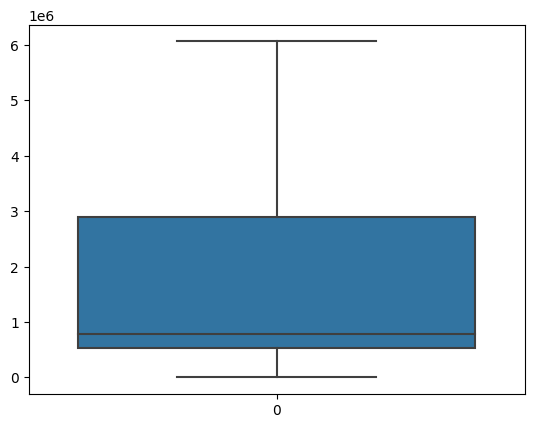

In [55]:
boxplot = sns.boxplot(df["first_amount_spent"]) #quì vado a creare un boxplot con seaborn per andare a vedere l'andamento
#della colonna first amount spent del mio dataframe

In [56]:
print("Verifica valori variabile target:")
df["Y"].unique() #con questa istruzione verifico quali sono i valori unici presenti nel mio dataframe sotto la colonna Y


print("Conteggio valori variabile target")
df["Y"].value_counts() #con questa unita alla funzione precedente, non solo vedo quali sono i valori unici del dataframe
#in più vado a vedere quanti elementi sono 1 e quanti elementi sono 0

Verifica valori variabile target:
Conteggio valori variabile target


0    1446
1    1006
Name: Y, dtype: int64

In [57]:
df.to_excel("DataFrameRipu0litoEsercizio4.xlsx") #con questa istruzione vado ad esportare i miei dati
#per far si che io abbia raggiunto una sorta di checkpoint grazie al quale salvo quanto fatto fin ora.

In [58]:
matrice_correlazione = df.corr() #vado a rigenerare la matrice di correlazione
#che posso successivamente rappresentare graficamente tramite una heatmap di seaborn.

C:\Users\renat\AppData\Local\Temp\ipykernel_12632\1932409509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlazione = df.corr() #vado a rigenerare la matrice di correlazione


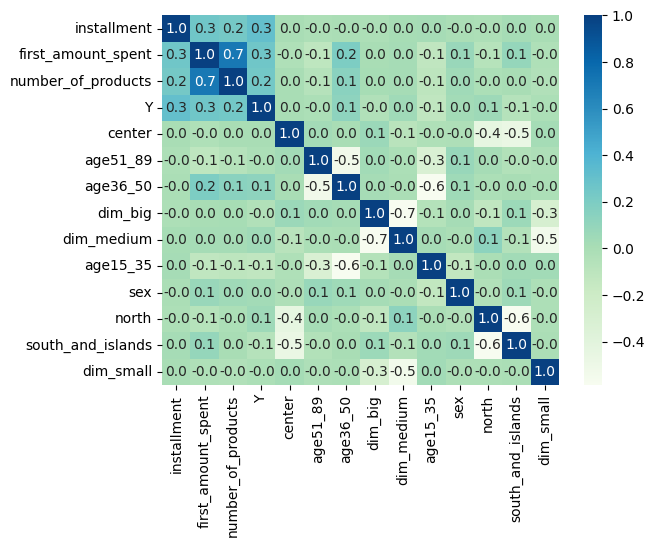

In [60]:
#vado a generare una "mappa di calore" per capire l'andamento dei miei dati all'interno del DF


plot = sns.heatmap(matrice_correlazione, vmax = 1, square = False,annot = True, fmt=".1f",cmap="GnBu", robust=True)
#genero una heatmap di seaborn immetteno alcuni parametri:
#il primo indica dove sono allocati i dati sul quale il mio grafico si deve basare
#il secondo (opzionale) indica il numero massimo che i miei valori assumono all'interno del grafico (se lo modifichi cambia la barra a destra e i colori all'interno del grafico)
#il terzo (opzionale) se ha un valore true setta le Axes aspect to equal, così che le celle abbiano una forma di un quadrato
#il quarto (opzionale) se ha un valore true scrive il valore del dato in ogni cella, se provi a toglierlo infatti eliminerà i valori e resteranno solo i colori
#il quinto (opzionale) indica il numero di elementi dopo la virgola che visualizzi all'interno della heatmap
#il sesto (opzionale) setta i colori della heatmap ad un particolare tono di colori
#il settimo (opzionale) se ha un valore true e vmin/vmax sono assenti, la colormap range è calcolata in quantili e non in valori extreme (?)